In [40]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [41]:
adult_lit = pd.read_csv('../data/UNdata_Export_20230926_021055618.csv', skipfooter = 2, engine = 'python')

In [42]:
adult_lit = adult_lit.drop(columns = ['Source', 'Value Footnotes', 'Unit'])

In [43]:
adult_lit = adult_lit.rename(columns = {'Value' : 'Percent_Value', 'Country or Area' : 'Country', 'Subgroup' : 'Gender'})

In [44]:
adult_lit

,Country,Gender,Year,Percent_Value
0,Afghanistan,Female 15+ yr,2000,12.6
1,Afghanistan,Male 15+ yr,2000,43.1
2,Albania,Female 15+ yr,2001,98.3
3,Albania,Male 15+ yr,2001,99.2
4,Algeria,Female 15+ yr,2002,60.1
...,...,...,...,...
475,Zambia,Male 15+ yr,1990,73.0
476,Zimbabwe,Female 15+ yr,2004,86.2
477,Zimbabwe,Female 15+ yr,1992,78.5
478,Zimbabwe,Male 15+ yr,2004,92.7


**1. Which Country had the highest & lowest Adult literacy Rate and in which year?**

In [45]:
adult_lit.sort_values('Percent_Value', ascending = False)

,Country,Gender,Year,Percent_Value
147,Estonia,Male 15+ yr,1989,99.9
216,Latvia,Male 15+ yr,2000,99.8
217,Latvia,Male 15+ yr,1989,99.8
120,Cuba,Female 15+ yr,2002,99.8
121,Cuba,Male 15+ yr,2002,99.8
...,...,...,...,...
86,Chad,Female 15+ yr,2000,12.8
0,Afghanistan,Female 15+ yr,2000,12.6
257,Mali,Female 15+ yr,1998,11.9
63,Burkina Faso,Female 15+ yr,1991,8.2


When observing the countries with the highest adult literacy rate, we find the the lowest adult lit rate belong to females 15 years old +.

**2. How does the adult literacy rate differ between females and males in the same country?**

In [47]:
# Average adult literacy rate for each gender in a Country
Fem_vs_Male_adult_lit = adult_lit.pivot_table(values = "Percent_Value", index = "Country", columns = 'Gender').reset_index()

In [ ]:
Fem_vs_Male_adult_lit['Adults'] = ((Fem_vs_Males_adult_lit['Female 15+ yr'])+(Fem_vs_Males_adult_lit['Male 15+ yr']))/2

In [49]:
Fem_vs_Male_adult_lit

Gender,Country,Female 15+ yr,Male 15+ yr,Adults
0,Afghanistan,12.60,43.10,27.850
1,Albania,98.30,99.20,98.750
2,Algeria,47.95,71.50,59.725
3,Angola,54.20,82.90,68.550
4,Argentina,96.60,96.70,96.650
...,...,...,...,...
130,Venezuela,90.85,92.00,91.425
131,Vietnam,84.85,93.45,89.150
132,Yemen,25.90,64.90,45.400
133,Zambia,58.60,74.65,66.625


**3. How does the female and male adult literacy rate differ on average in the same year?**

In [29]:
adult_lit_pivot_year = adult_lit.pivot_table(values = "Percent_Value", index = "Year", columns = 'Gender').reset_index()

In [51]:
adult_lit_pivot_year['Adults'] = ((adult_lit_pivot_year['Female 15+ yr'])+(adult_lit_pivot_year['Male 15+ yr']))/2


In [52]:
adult_lit_pivot_year

Gender,Year,Female 15+ yr,Male 15+ yr,Adults
0,1985,80.325000,88.175000,84.250000
1,1986,52.525000,66.650000,59.587500
2,1987,51.600000,70.533333,61.066667
3,1988,27.425000,50.175000,38.800000
4,1989,95.810000,98.670000,97.240000
5,1990,74.657143,85.121429,79.889286
6,1991,66.252381,77.638095,71.945238
7,1992,75.960000,85.250000,80.605000
8,1993,76.066667,84.600000,80.333333
9,1994,60.825000,75.141667,67.983333


**This is the percent value for both females and males in the same country and year**

<Figure size 1000x600 with 0 Axes>

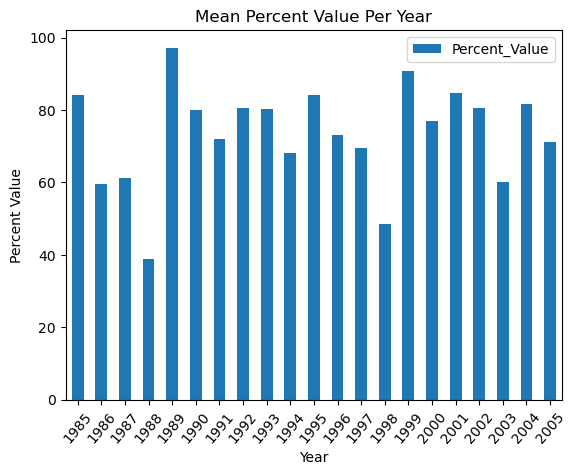

In [34]:
plt.figure(figsize = (10,6))

adult_lit.groupby(['Year'])[['Percent_Value']].mean().plot(kind = 'bar')
plt.title('Mean Percent Value Per Year')
plt.ylabel('Percent Value')
plt.xticks(rotation = 50);

**Introducing GDP_df and merging with Adult_lit**

In [53]:
GDP_df = pd.read_csv('../data/gdp_per_capita.csv')

In [54]:
GDP_df = GDP_df.drop(['Value Footnotes'], axis = 1)

In [55]:
GDP_df = GDP_df.rename(columns = {'Country or Area' : 'Country', 'Value' : 'GDP_Per_Capita'})

In [56]:
adult_lit_and_GDP = pd.merge(GDP_df, adult_lit)

In [57]:
adult_lit_and_GDP

,Country,Year,GDP_Per_Capita,Gender,Percent_Value
0,Albania,2001,6441.449833,Female 15+ yr,98.3
1,Albania,2001,6441.449833,Male 15+ yr,99.2
2,Algeria,2002,9232.415784,Female 15+ yr,60.1
3,Algeria,2002,9232.415784,Male 15+ yr,79.6
4,Angola,2001,4746.660523,Female 15+ yr,54.2
...,...,...,...,...,...
355,Zambia,1990,2190.181724,Male 15+ yr,73.0
356,Zimbabwe,2004,1979.200783,Female 15+ yr,86.2
357,Zimbabwe,2004,1979.200783,Male 15+ yr,92.7
358,Zimbabwe,1992,2437.152908,Female 15+ yr,78.5


In [17]:
adult_lit_GDP_grouped = adult_lit_and_GDP.groupby(['Country', 'Year'])[['Percent_Value', 'GDP_Per_Capita']].mean()

In [20]:
adult_lit_GDP_grouped


Percent_Value  GDP_Per_Capita
Country   Year                               
Albania   2001          98.75     6441.449833
Algeria   2002          69.85     9232.415784
Angola    2001          68.55     4746.660523
Argentina 1991          96.10    15221.792147
          2001          97.20    17610.755386
...                       ...             ...
Vietnam   1999          90.40     3455.112485
Zambia    1990          65.20     2190.181724
          1999          68.05     1968.215220
Zimbabwe  1992          83.70     2437.152908
          2004          89.45     1979.200783

[180 rows x 2 columns]

<Axes: xlabel='Percent_Value', ylabel='GDP_Per_Capita'>

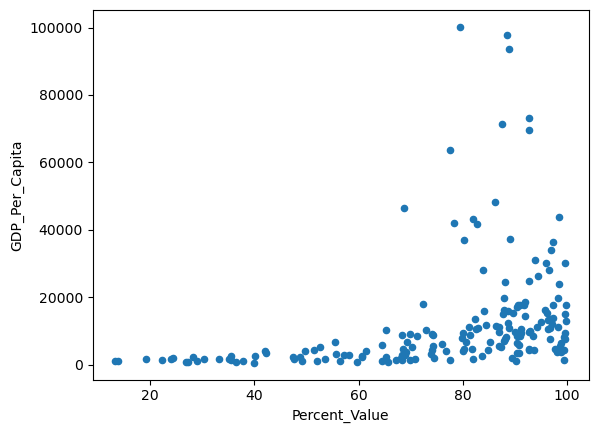

In [21]:
adult_lit_GDP_grouped.plot.scatter(x = 'Percent_Value', y = 'GDP_Per_Capita')

In [19]:
adult_lit_GDP_grouped[['Percent_Value', 'GDP_Per_Capita']].corr()

,Percent_Value,GDP_Per_Capita
Percent_Value,1.000000,0.332178
GDP_Per_Capita,0.332178,1.000000


**Next few code shows me ceating a pivot table with each gender and average literacy rate from 1990 - 2005**

In [45]:
adult_lit_Fem = adult_lit_and_GDP.loc[adult_lit_and_GDP['Gender'].isin(['Female 15+ yr'])].pivot_table(values = 'Percent_Value', index = 'Year', columns = 'Gender').dropna().reset_index()

In [46]:
adult_lit_Fem

Gender,Year,Female 15+ yr
0,1990,73.860000
1,1991,61.605882
2,1992,73.844444
3,1993,76.066667
4,1994,66.400000
5,1995,81.180000
6,1996,69.471429
7,1997,25.000000
8,1998,37.975000
9,1999,88.250000


In [47]:
adult_lit_Male = adult_lit_and_GDP.loc[adult_lit_and_GDP['Gender'].isin(['Male 15+ yr'])].pivot_table(values = 'Percent_Value', index = 'Year', columns = 'Gender').dropna().reset_index()

In [63]:
adult_lit_Male

Gender,Year,Male 15+ yr
0,1990,84.050000
1,1991,73.517647
2,1992,84.144444
3,1993,84.600000
4,1994,76.112500
5,1995,87.300000
6,1996,76.542857
7,1997,54.800000
8,1998,59.100000
9,1999,90.566667


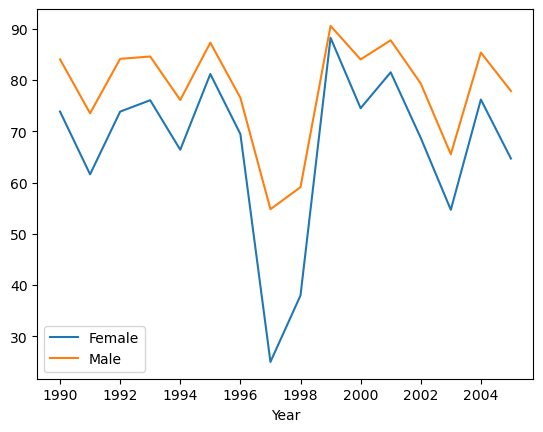

In [50]:
axes = plt.gca()
adult_lit_Fem.plot.line(x='Year', y='Female 15+ yr', label='Female', ax=axes);
adult_lit_Male.plot.line(x='Year', y='Male 15+ yr', label='Male', ax=axes);

**Does Adult Literacy and GDP have a correlation**

**Which continent has the highest Adult Literacy**

In [ ]:
pd.read_csv('..')